In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = pd.read_csv('GRAB.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.010,11.010,8964400
1,2021-12-02,13.055,13.29,8.13,8.750,8.750,35751200
2,2021-12-03,9.160,9.52,8.45,8.990,8.990,29667200
3,2021-12-06,8.950,9.10,8.23,9.000,9.000,25416000
4,2021-12-07,9.055,9.06,8.32,8.850,8.850,25775900
...,...,...,...,...,...,...,...
520,2023-12-27,3.300,3.33,3.25,3.270,3.270,7653900
521,2023-12-28,3.300,3.34,3.23,3.250,3.250,16691300
522,2023-12-29,3.290,3.40,3.27,3.370,3.370,17679200
523,2024-01-02,3.370,3.37,3.26,3.300,3.300,18982900


In [3]:
df = pd.DataFrame(dataset)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
# Pilih kolom yang relevan untuk pengelompokan
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [5]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Hitung matriks linkage menggunakan metode Ward
linkage_matrix = linkage(X_scaled, method='ward')

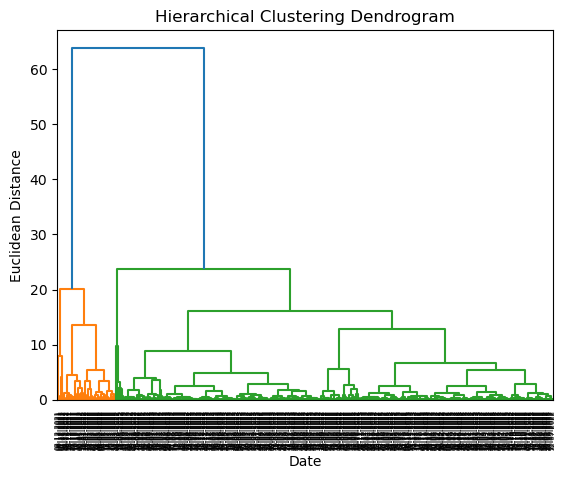

In [7]:
# Plot dendrogram
dendrogram(linkage_matrix, labels=df.index.strftime('%d-%m-%Y'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Date')
plt.ylabel('Euclidean Distance')
plt.show()

### Evaluasi Model

In [8]:
from scipy.cluster.hierarchy import fcluster

# Tetapkan label cluster berdasarkan jumlah cluster yang dipilih
num_clusters = 3  # Ubah ini ke jumlah cluster yang dipilih
labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Tambahkan label cluster ke DataFrame
df['Cluster'] = labels

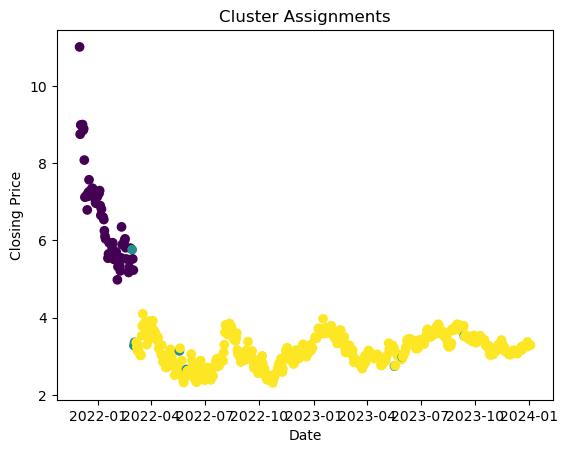

In [9]:
# Visualisasikan tugas cluster
plt.scatter(df.index, df['Close'], c=df['Cluster'], cmap='viridis')
plt.title('Cluster Assignments')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7658906946807421
